In [1]:
import matplotlib.pyplot as plt

path = '..\\13_Streamlined Data Ingestion with pandas\\data\\'

# Introduction to flat files

Get data from CSVs
In this exercise, you'll create a data frame from a CSV file. The United States makes available CSV files containing tax data by ZIP or postal code, allowing us to analyze income information in different parts of the country. We'll focus on a subset of the data, vt_tax_data_2016.csv, which has select tax statistics by ZIP code in Vermont in 2016.

To load the data, you'll need to import the pandas library, then read vt_tax_data_2016.csv and assign the resulting data frame to a variable. Then we'll have a look at the data.

- Import the pandas library as pd.
- Use read_csv() to load vt_tax_data_2016.csv and assign it to the variable data.
- View the first few lines of the data frame with the head() method. This code has been written for you.

In [2]:
# Import pandas as pd
import pandas as pd

# Read the CSV and assign it to the variable data
data = pd.read_csv(path + 'vt_tax_data_2016.csv')

# View the first few lines of data
print(data.head())

   STATEFIPS STATE  zipcode  agi_stub      N1  mars1  MARS2  MARS4   PREP  \
0         50    VT        0         1  111580  85090  14170  10740  45360   
1         50    VT        0         2   82760  51960  18820  11310  35600   
2         50    VT        0         3   46270  19540  22650   3620  24140   
3         50    VT        0         4   30070   5830  22190    960  16060   
4         50    VT        0         5   39530   3900  33800    590  22500   

       N2  ...  N10300  A10300  N85530  A85530  N85300  A85300  N11901  \
0  130630  ...   53660   50699       0       0       0       0   10820   
1  132950  ...   74340  221146       0       0       0       0   12820   
2   91870  ...   44860  266097       0       0       0       0   10810   
3   71610  ...   29580  264678       0       0       0       0    7320   
4  103710  ...   39170  731963      40      24       0       0   12500   

   A11901  N11902  A11902  
0    9734   88260  138337  
1   20029   68760  151729  
2   2449

Nice work! read_csv() has lots of parameters for customizing imports, but many CSVs can be loaded as data frames just by passing the file path. It even works with URLs that end in '.csv'.

### Get data from other flat files
While CSVs are the most common kind of flat file, you will sometimes find files that use different delimiters. read_csv() can load all of these with the help of the sep keyword argument. By default, pandas assumes that the separator is a comma, which is why we do not need to specify sep for CSVs.

The version of Vermont tax data here is a tab-separated values file (TSV), so you will need to use sep to pass in the correct delimiter when reading the file. Remember that tabs are represented as \t. Once the file has been loaded, the remaining code groups the N1 field, which contains income range categories, to create a chart of tax returns by income category.

- Import pandas with the alias pd.
- Load vt_tax_data_2016.tsv, making sure to set the correct delimiter with the sep keyword argument.

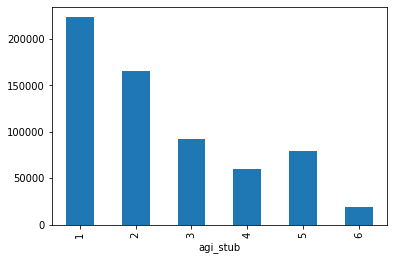

In [3]:
# Import pandas with the alias pd
import pandas as pd

# Load TSV using the sep keyword argument to set delimiter
data = pd.read_csv(path + 'vt_tax_data_2016.tsv', sep='\t')

# Plot the total number of tax returns by income group
counts = data.groupby("agi_stub").N1.sum()
counts.plot.bar()
plt.show()

Well done! When in doubt about the separator being used, you can always examine the file in a spreedsheet program, text editor, or with Python itself.

# Modifying flat file imports

Import a subset of columns
The Vermont tax data contains 147 columns describing household composition, income sources, and taxes paid by ZIP code and income group. Most analyses don't need all these columns. In this exercise, you will create a data frame with fewer variables using read_csv()s usecols argument.

Let's focus on household composition to see if there are differences by geography and income level. To do this, we'll need columns on income group, ZIP code, tax return filing status (e.g., single or married), and dependents. The data uses codes for variable names, so the specific columns needed are in the instructions.

pandas has already been imported as pd.

- Create a list of columns to use: zipcode, agi_stub (income group), mars1 (number of single households), MARS2 (number of households filing as married), and NUMDEP (number of dependents).
- Create a data frame from vt_tax_data_2016.csv that uses only the selected columns.

In [4]:
# Create list of columns to use
cols = ['zipcode', 'agi_stub', 'mars1', 'MARS2', 'NUMDEP']

# Create data frame from csv using only selected columns
data = pd.read_csv(path + "vt_tax_data_2016.csv", usecols=cols)

# View counts of dependents and tax returns by income level
print(data.groupby("agi_stub").sum())

          zipcode   mars1  MARS2  NUMDEP
agi_stub                                
1         1439444  170320  28480   52490
2         1439444  104000  37690   64660
3         1439444   39160  45390   47330
4         1439444   11670  44410   37760
5         1439444    7820  67750   60730
6         1439444    1210  16340   16300


There is a saying that rows are cheap, but columns are expensive. Limiting datasets to only variables of interest makes them more manageable and streamlines pipelines, but make sure you aren't losing confounding data in the process.

Import a file in chunks
When working with large files, it can be easier to load and process the data in pieces. Let's practice this workflow on the Vermont tax data.

The first 500 rows have been loaded as vt_data_first500. You'll get the next 500 rows. To do this, you'll employ several keyword arguments: nrows and skiprows to get the correct records, header to tell pandas the data does not have column names, and names to supply the missing column names. You'll also want to use the list() function to get column names from vt_data_first500 to reuse.

pandas has been imported as pd.

- Use nrows and skiprows to make a data frame, vt_data_next500, with the next 500 rows.
- Set the header argument so that pandas knows there is no header row.
- Name the columns in vt_data_next500 by supplying a list of vt_data_first500's columns to the names argument.

In [5]:
vt_data_first500 = pd.read_csv(path + "vt_tax_data_2016.csv", nrows=500)

col_names = list(vt_data_first500)
# Create data frame of next 500 rows with labeled columns
vt_data_next500 = pd.read_csv(path + "vt_tax_data_2016.csv", 
                       		  skiprows=500,
                       		  nrows=500,
                       		  header=None,
                       		  names=col_names)

# View the Vermont data frames to confirm they're different
print(vt_data_first500.head())
print(vt_data_next500.head())

   STATEFIPS STATE  zipcode  agi_stub      N1  mars1  MARS2  MARS4   PREP  \
0         50    VT        0         1  111580  85090  14170  10740  45360   
1         50    VT        0         2   82760  51960  18820  11310  35600   
2         50    VT        0         3   46270  19540  22650   3620  24140   
3         50    VT        0         4   30070   5830  22190    960  16060   
4         50    VT        0         5   39530   3900  33800    590  22500   

       N2  ...  N10300  A10300  N85530  A85530  N85300  A85300  N11901  \
0  130630  ...   53660   50699       0       0       0       0   10820   
1  132950  ...   74340  221146       0       0       0       0   12820   
2   91870  ...   44860  266097       0       0       0       0   10810   
3   71610  ...   29580  264678       0       0       0       0    7320   
4  103710  ...   39170  731963      40      24       0       0   12500   

   A11901  N11902  A11902  
0    9734   88260  138337  
1   20029   68760  151729  
2   2449

Nicely done! The techniques you used here can also be employed to explore data before committing to loading all of it, to skip rows you know don't contain useful data, or to relabel all columns in a dataset.

# Handling errors and missing data

### Specify data types
When loading a flat file, pandas infers the best data type for each column. Sometimes its guesses are off, particularly for numbers that represent groups or qualities instead of quantities.

Looking at the data dictionary for vt_tax_data_2016.csv reveals two such columns. The agi_stub column contains numbers that correspond to income categories, and zipcode has 5-digit values that should be strings -- treating them as integers means we lose leading 0s, which are meaningful. Let's specify the correct data types with the dtype argument.

pandas has been imported for you as pd.

- Load vt_tax_data_2016.csv with no arguments and view the data frame's dtypes attribute. Note the data types of zipcode and agi_stub.

In [6]:
# Load csv with no additional arguments
data = pd.read_csv(path + "vt_tax_data_2016.csv")

# Print the data types
print(data.dtypes)

STATEFIPS     int64
STATE        object
zipcode       int64
agi_stub      int64
N1            int64
              ...  
A85300        int64
N11901        int64
A11901        int64
N11902        int64
A11902        int64
Length: 147, dtype: object


- Create a dictionary, data_types, specifying that agi_stub is "category" data and zipcode is string data.
- Reload the CSV with the dtype argument and the dictionary to set the correct column data types.
- View the data frame's dtypes attribute.

In [7]:
# Create dict specifying data types for agi_stub and zipcode
data_types = {'agi_stub':'category',
			  'zipcode':str}

# Load csv using dtype to set correct data types
data = pd.read_csv(path + "vt_tax_data_2016.csv", dtype=data_types)

# Print data types of resulting frame
print(data.dtypes.head())

STATEFIPS       int64
STATE          object
zipcode        object
agi_stub     category
N1              int64
dtype: object


Nice work! Setting data types at import requires becoming familiar with the data first, but it can save effort later on. A common workflow is to load the data and explore it, then write code that sets data types at import to share with colleagues or other audiences.

### Set custom NA values
Part of data exploration and cleaning consists of checking for missing or NA values and deciding how to account for them. This is easier when missing values are treated as their own data type. and there are pandas functions that specifically target such NA values. pandas automatically treats some values as missing, but we can pass additional NA indicators with the na_values argument. Here, you'll do this to ensure that invalid ZIP codes in the Vermont tax data are coded as NA.

pandas has been imported as pd.

- Create a dictionary, null_values, specifying that 0s in the zipcode column should be considered NA values.
- Load vt_tax_data_2016.csv, using the na_values argument and the dictionary to make sure invalid ZIP codes are treated as missing.

In [8]:
# Create dict specifying that 0s in zipcode are NA values
null_values = {'zipcode':0}

# Load csv using na_values keyword argument
data = pd.read_csv(path + "vt_tax_data_2016.csv", 
                   na_values=null_values)

# View rows with NA ZIP codes
print(data[data.zipcode.isna()])

   STATEFIPS STATE  zipcode  agi_stub      N1  mars1  MARS2  MARS4   PREP  \
0         50    VT      NaN         1  111580  85090  14170  10740  45360   
1         50    VT      NaN         2   82760  51960  18820  11310  35600   
2         50    VT      NaN         3   46270  19540  22650   3620  24140   
3         50    VT      NaN         4   30070   5830  22190    960  16060   
4         50    VT      NaN         5   39530   3900  33800    590  22500   
5         50    VT      NaN         6    9620    600   8150      0   7040   

       N2  ...  N10300  A10300  N85530  A85530  N85300  A85300  N11901  \
0  130630  ...   53660   50699       0       0       0       0   10820   
1  132950  ...   74340  221146       0       0       0       0   12820   
2   91870  ...   44860  266097       0       0       0       0   10810   
3   71610  ...   29580  264678       0       0       0       0    7320   
4  103710  ...   39170  731963      40      24       0       0   12500   
5   26430  ...  

Now that NA values are marked as such, it's possible to use NA-specific functions to do things like count missing values, as we did here, or drop records with missing values.

### Skip bad data (no Dataset)
In this exercise you'll use read_csv() parameters to handle files with bad data, like records with more values than columns. By default, trying to import such files triggers a specific error, pandas.io.common.CParserError.

Some lines in the Vermont tax data here are corrupted. In order to load the good lines, we need to tell pandas to skip errors. We also want pandas to warn us when it skips a line so we know the scope of data issues.

pandas has been imported as pd. The exercise code will try to read the file. If there is a pandas.io.common.CParserError, the code in the except block will run.

- Try to import the file vt_tax_data_2016_corrupt.csv without any keyword arguments.
- Import vt_tax_data_2016_corrupt.csv with the error_bad_lines parameter set to skip bad records.
- Update the import with the warn_bad_lines parameter set to issue a warning whenever a bad record is skipped.

In [9]:
# try:
#   # Import the CSV without any keyword arguments
#   data = pd.read_csv('vt_tax_data_2016_corrupt.csv')
  
#   # View first 5 records
#   print(data.head())
  
# except pd.io.common.CParserError:
#     print("Your data contained rows that could not be parsed.")

In [10]:
# try:
#   # Import CSV with error_bad_lines set to skip bad records
#   data = pd.read_csv("vt_tax_data_2016_corrupt.csv", 
#                      error_bad_lines=False)
  
#   # View first 5 records
#   print(data.head())
  
# except pd.io.common.CParserError:
#     print("Your data contained rows that could not be parsed.")

In [11]:
# try:
#   # Set warn_bad_lines to issue warnings about bad records
#   data = pd.read_csv("vt_tax_data_2016_corrupt.csv", 
#                      error_bad_lines=False, 
#                      warn_bad_lines=True)
  
#   # View first 5 records
#   print(data.head())
  
# except pd.io.common.CParserError:
#     print("Your data contained rows that could not be parsed.")

Well done! Flat files are just the beginning when it comes to data ingestion. In the next chapters, you'll learn how to automate data imports from other sources, plus more ways to fine-tune imports. A note about this exercise: the exercise console doesn't usually display warnings, so this exercise uses a slightly modified version of read_csv() that prints warnings, just like you would see if you ran the code in a local environment.